In [1]:
include("../src/Conduction.jl");
using Plots, LaTeXStrings, QuadGK;

semiconductor = Conduction.Semiconductor(
4.34e7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
0.1 * 1.6e-19, # Mode effect of the phonons (J)
3e21, # intrinsic semiconductor's density (cm^-3)
0, # Doping states' density (cm^-3)
0.1 * 1.6e-19, # Energy to a vacant target site (J)
-5.3e4, # Field (V.cm^-1)
1e13, # Base electron jump rate
-27, # Fermi level (J)
2.74, # Intrinsic semiconductor's gaussian width (J)
2.7, # Doping states' gaussian width (J)
2.7, # Amount of disorder
1 / (4.64e-6)
);

    T = 300;

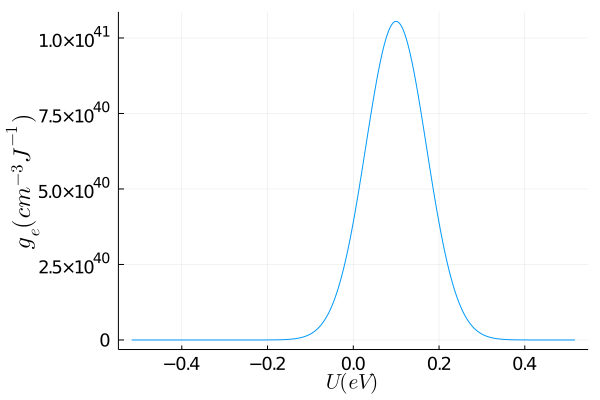

In [10]:
range = -20:0.1:20;

res = (x -> Conduction.DOS(semiconductor, x, T)).(range);
range = range .* ((Conduction.k * T) / (1.602e-19));
plot(range, res, xlabel=L"U (eV)", ylabel=L"g_e (cm^{-3}J^{-1})", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

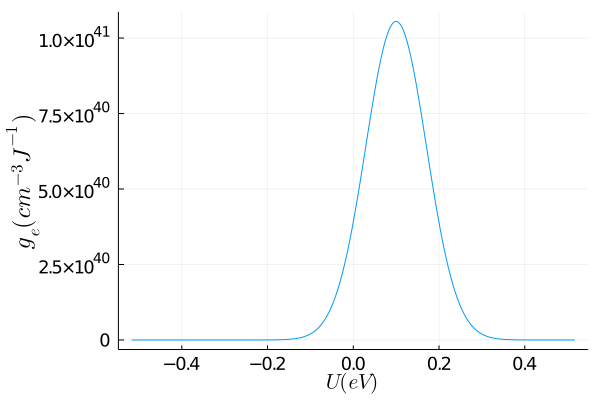

In [11]:
semiconductor.Nd = 2.1e18;

range = -20:0.1:20;

res = (x -> Conduction.DOS(semiconductor, x, T)).(range);
range = range .* ((Conduction.k * T) / (1.602e-19));
plot(range, res, xlabel=L"U (eV)", ylabel=L"g_e (cm^{-3}J^{-1})", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

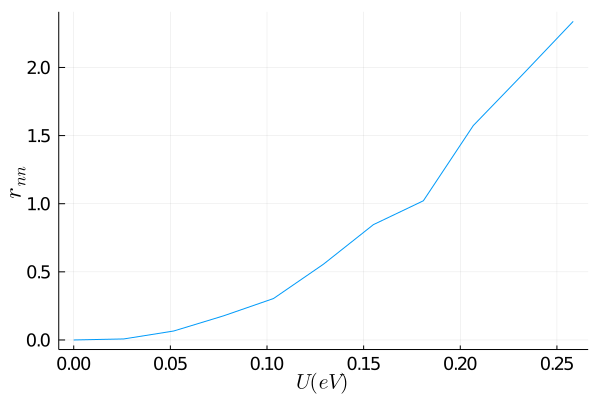

In [16]:
semiconductor = Conduction.Semiconductor(
4.34e7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
0.1 * 1.6e-19, # Mode effect of the phonons (J)
3e21, # intrinsic semiconductor's density (cm^-3)
0, # Doping states' density (cm^-3)
0.1 * 1.6e-19, # Energy to a vacant target site (J)
-5.3e7, # Field (V.cm^-1)
1e13, # Base electron jump rate
-27, # Fermi level (J)
2.74, # Intrinsic semiconductor's gaussian width (J)
2.7, # Doping states' gaussian width (J)
2.7, # Amount of disorder
1 / (4.64e-6)
);

T = 300;

range2 = 0:1:10;
res2 = (x -> Conduction.N(semiconductor, 0, T, x)).(range2)

range2 = range2 .* ((Conduction.k * T) / (1.602e-19));
plot(range2, res2, xlabel=L"U (eV)", ylabel=L"r_{nn}", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

In [5]:
range = -10:1:10;


res = (x -> Conduction.xf(semiconductor, Conduction.RnnVRH(semiconductor, x, T), x, T)).(range);

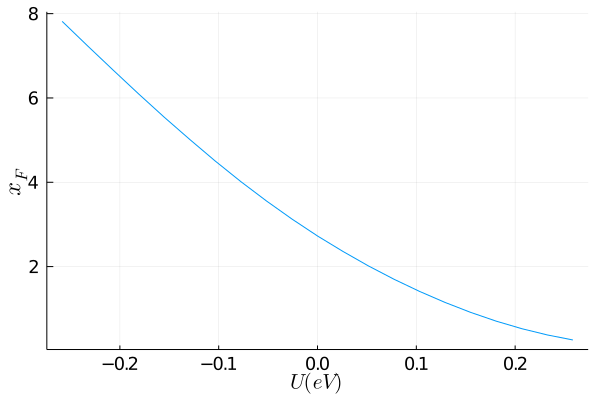

In [6]:
plot( range .* ((Conduction.k * T) / (1.602e-19)), res,  xlabel=L"U (eV)", ylabel=L"x_F", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

In [ ]:
function I1(x)
    R = Conduction.RnnVRH(semiconductor, x, T);
    return Conduction.I1(x, T, semiconductor, R)
end

res = I1.(range);

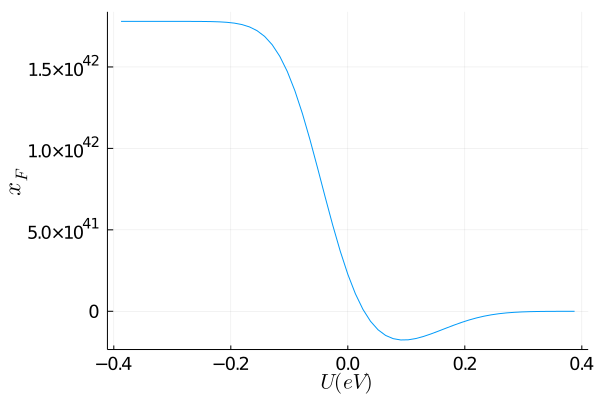

In [ ]:
plot( range .* ((Conduction.k * T) / (1.602e-19)), res,  xlabel=L"U (eV)", ylabel=L"I_1", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

In [ ]:
function I2(x)
    R = Conduction.RnnVRH(semiconductor, x, T);
    return Conduction.I2(x, T, semiconductor, R)
end

res = I2.(range);

In [ ]:
semiconductor = Conduction.Semiconductor(
4.34e7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
0.1 * 1.6e-19, # Mode effect of the phonons (J)
3e21, # intrinsic semiconductor's density (cm^-3)
0, # Doping states' density (cm^-3)
0.1 * 1.6e-19, # Energy to a vacant target site (J)
-5.3e8, # Field (V.cm^-1)
1e13, # Base electron jump rate
-27, # Fermi level (J)
2.74, # Intrinsic semiconductor's gaussian width (J)
2.7, # Doping states' gaussian width (J)
2.7, # Amount of disorder
1 / (4.64e-6)
);

function overallxf(semiconductor, Rnn::Function, T, x_limit::Real)
    fd(x) = Conduction.occupiedStates(semiconductor, x, T);

    function fn(x::Real, Rnn::Function)
        Rnn = Rnn(semiconductor, x, T)
        return Conduction.occupiedStates(semiconductor, x, T) * Conduction.xf(semiconductor, Rnn, x, T)
    end

    fn_final(x) = fn(x, Rnn);

    return Conduction.average_density(fn_final, fd, x_limit)
end

overallxf(semiconductor, Conduction.RnnVRH, T, 15)

-235.98032013179278

In [9]:
res = []
range = vcat([[1, 3, 5, 7, 9] * 10^i for i in 4:1:7]...);
# for i in range
    # semiconductor = Conduction.Semiconductor(
    #     4.34e7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
    #     0.1 * 1.6e-19, # Mode effect of the phonons (J)
    #     3e21, # intrinsic semiconductor's density (cm^-3)
    #     0, # Doping states' density (cm^-3)
    #     0.1 * 1.6e-19, # Energy to a vacant target site (J)
    #     -i, # Field (V.cm^-1)
    #     1e13, # Base electron jump rate
    #     -27, # Fermi level (J)
    #     2.74, # Intrinsic semiconductor's gaussian width (J)
    #     2.7, # Doping states' gaussian width (J)
    #     2.7, # Amount of disorder
    #     1 / (4.64e-6)
    # );
#     append!(res,overallxf(semiconductor, Conduction.RnnVRH, T, 15) )
# end

function xf_utils(x::Real)
    semiconductor = Conduction.Semiconductor(
        4.34e7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
        0.1 * 1.6e-19, # Mode effect of the phonons (J)
        3e21, # intrinsic semiconductor's density (cm^-3)
        0, # Doping states' density (cm^-3)
        0.1 * 1.6e-19, # Energy to a vacant target site (J)
        -x, # Field (V.cm^-1)
        1e13, # Base electron jump rate
        -27, # Fermi level (J)
        2.74, # Intrinsic semiconductor's gaussian width (J)
        2.7, # Doping states' gaussian width (J)
        2.7, # Amount of disorder
        1 / (4.64e-6)
    );
    Rnn = Conduction.RnnVRH(semiconductor, 0, T)
    return  Conduction.xf(semiconductor, Rnn, 0, T)
end

res = xf_utils.(range);

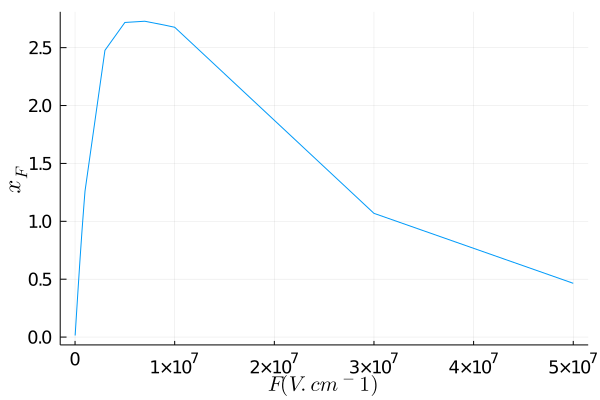

In [19]:
plot(range[1:end-5], res[1:end-5], xlabel=L"F(V.cm^-1)", ylabel=L"x_F", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

In [ ]:
res = []

function overallRnn(semiconductor, Rnn::Function, T, x_limit::Real)
    fd(x) = Conduction.occupiedStates(semiconductor, x, T);

    function fn(x::Real, Rnn::Function)
        return Rnn(semiconductor, x, T)
    end

    fn_final(x) = fn(x, Rnn);

    return Conduction.average_density(fn_final, fd, x_limit)
end

range = [1e5, 1e6, 1e7]

for i in range
    semiconductor = Conduction.Semiconductor(
        4.34e7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
        0.1 * 1.6e-19, # Mode effect of the phonons (J)
        3e21, # intrinsic semiconductor's density (cm^-3)
        0, # Doping states' density (cm^-3)
        0.1 * 1.6e-19, # Energy to a vacant target site (J)
        -i, # Field (V.cm^-1)
        1e13, # Base electron jump rate
        -27, # Fermi level (J)
        2.74, # Intrinsic semiconductor's gaussian width (J)
        2.7, # Doping states' gaussian width (J)
        2.7, # Amount of disorder
        1 / (4.64e-6)
    );
    append!(res,overallRnn(semiconductor, Conduction.RnnVRH, T, 15) )
end

In [ ]:
res

3-element Array{Any,1}:
 4.492333011302468e-30
 4.334365513445166e-30
 2.7012700682033982e-30